# <center>PENERAPAN LOGIKA FUZZY METODE SUGENO UNTUK MENENTUKAN JUMLAH PRODUKSI ROTI BERDASARKAN DATA PERSEDIAAN DAN JUMLAH PERMINTAAN
## <center>(Studi Kasus : PABRIK ROTI SARINDA AMBON )

- __NAMA  : Asri Safmi__
- __NIM   : 09011181722002__
- __KELAS : SK5B__
- __MK    : KECERDASAN BUATAN__
- __Dosen Pengampuh : Prof. Dr. Ir. Siti Nurmaini, M.T.__

### Abstrak
Keuntungan yang maksimal diperoleh dari penjualan yang maksimal. Apabila jumlah produk yang diproduksi oleh perusahaan kurang dari jumlah permintaan maka perusahaan akan kehilangan peluang untuk mendapatkan keuntungan yang maksimal dan sebaliknya. Oleh karena itu, perencanaan jumlah produk dalam Pabrik Roti Sarinda sangatlah penting. Agar dapat memenuhi permintaan pasar dengan tepat dan dengan jumlah yang sesuai. Faktor-faktor yang perlu diperhatikan dalam menentukan jumlah produk, antara lain: 

1. jumlah persediaan 
2. jumlah permintaan

Penulisan dan pembahasan pada penelitian ini adalah tentang sistem inferensi Fuzzy Metode Sugeno, penerapan sistem inferensi Fuzzy Metode Sugeno untuk menentukan jumlah produksi berdasarkan jumlah permintaaan dan data persediaan yang dimana data dari penulisan ini didapat dari Pabrik Roti Sarinda . 

Guna fuzzy dalam kasus ini adalah sebagai decision making dalam menentukan kelayakan penerbitan paper menggunakan metode mamdani dengan menggunakan 2 fungsi yaitu trapeziodal dan triangular.


In [1]:
#memanggil library yang akan digunakan
#skfuzzy adalah library fuzzy logic pada python yang bekerja dengan numpy array
#Numpy Array yang akan digunakan untuk menyimpan nilai variabel yang saya inisiasi menjadi "np"
#Skfuzzy adalah module untuk Fuzzy Logic yang saya inisiasi menjadi "fuzz"
#Matplotlib.pyplot digunakan untuk menampilkan grafik membership function untuk setiap variabel
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

- proses pemanggilan library yang akan dipakai
- skfuzzy adalah library fuzzy logic pada python yang bekerja dengan numpy array

### FUZZYFIKASI

Fuzzyfikasi merupakan proses untuk mengubah input sistem yang mempunyai nilai tegas menjadi variabel linguistik munggunakan fungsi keanggotaan yang disimpan dalam basis pengetahuan fuzzy. Dalam hal ini, terdapat 3 variabel, yaitu 2 variabel input dan 1 variabel output.

inputan terdiri dari dua variabel yaitu permintaan dan persediaan, dimana setiap variabel akan disusun domain himpunan fuzzynya, setelah itu akan ditentukan fungsi keanggotaan dari masing-masing variabel.

## Variabel Input  :
untuk variabel input pada pemintaan terdapat tiga tiga kriteria yaitu kecil (1030 - 1310 ), sedang(1030-1589), dan besar(1310 - 1589 ). pada variabel persediaan juga memiliki tiga kriteria yaitu sedikit (607-750), sedang(607-894), dan banyak(750-894).

## Variabel Output
untuk variabel output nya diberi nama produksi dan memiliki tiga kriteria yaitu sedikit (1996-2275), sedang(1996-2579), dan banyak(2275-2579).
    
pada metode ini penentuan variabel yang digunakan dalam penelitian ini ditunjukan pada tabel dibawah ini :

|    Fungsi   |     Nama Variabe     |      Rentang    | 
|-------------|----------------------|-----------------|
|    Input    |      Permintaan      |   [1000-1600]   |
|             |      Persediaan      |     [600-900]   |
|-------------|----------------------|-----------------|
|    Output   |   Jumlah Produksi    |   [1950-2600]   | 

<center>__Tabel Rentang untuk semua variabel fuzzy__

    Dari tabel tersebut dibuat nilai minimum dan maksimum dari tiap-tiap variabel :

|    Fungsi   |     Nama Variabe     |      Rentang      | 
|-------------|----------------------|-------------------|
|    Input    |      Permintaan      |   [1030 - 1589]   |
|             |      Persediaan      |    [607 - 894]    |
|-------------|----------------------|-------------------|
|    Output   |   Jumlah Produksi    |   [1996 - 2579]   | 

<center>__Tabel. Nilai minimum dan maksimum dari variabel input output pada data__

### 1.  membuat fungsi keangggotaan untuk variabel permintaan

In [2]:
permintaan = ctrl.Antecedent(np.arange(1000, 1601 , 1),'Jumlah_Permintaan') #variabel permintaan untuk nilai 0 sampai 1601engan range 1

permintaan['Kecil'] = fuzz.trapmf(permintaan.universe,[1000, 1000, 1030, 1310]) #fungsi keanggotaan untuk trapesium dengan nilai 1000 sampai 1310
permintaan['Sedang'] = fuzz.trimf(permintaan.universe,[1030, 1310, 1589]) #fungsi keanggotaan untuk segitiga dengan nilai 1030 sampai 1589
permintaan['Besar'] = fuzz.trapmf(permintaan.universe,[1310, 1589, 1600, 1600]) #fungsi keanggotaan untuk trapesium dengan nilai 1310 sampai 1589

$Permintaan[Kecil] =
\left\{
    \begin {array}{ll}
        1 & \mbox{; } x\leq 1030\\
        {1310-x \over 1310-1030} & \mbox{; } 1030 < x < 1310 \\
        0 & \mbox{; } x \geq 1310
     \end {array}
\right.$

$Permintaan[Sedang] =
\left\{
    \begin {array}{ll}
        1 & \mbox{; } x\leq 1030 & atau &x \geq 1589\\
        {x-1310 \over 1310-1030} & \mbox{; } 1030 < x < 1310 \\
         {1589-x \over 1589-1310} & \mbox{; } 1310 \leq  x \leq 1589
     \end {array}
\right.$

$Permintaan[Besar] =
\left\{
    \begin {array}{ll}
        0 & \mbox{; } x\leq 1310\\
        {x-1310 \over 1589-1310} & \mbox{; } 1310 < x < 1589 \\
        1 & \mbox{; } x \geq 1589
     \end {array}
\right.$


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


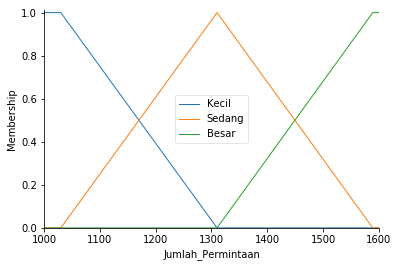

In [3]:
permintaan.view() #aturan untuk memunculkan variabel permintaan

### 2.  membuat fungsi keangggotaan untuk variabel persediaan

In [4]:
persediaan = ctrl.Antecedent(np.arange(600, 901 , 1),'Jumlah_Persediaan') #variabel persediaan untuk nilai 600 sampai 901 dengan range 1

persediaan['Sedikit'] = fuzz.trapmf(persediaan.universe, [600, 600, 607, 750]) #fungsi keanggotaan untuk trapesium dengan nilai 600 sampai 750
persediaan['Sedang'] = fuzz.trimf(persediaan.universe, [607, 750, 894]) #fungsi keanggotaan untuk segitiga dengan nilai 607 sampai 894
persediaan['Banyak'] = fuzz.trapmf(persediaan.universe, [750, 894, 900, 900]) #fungsi keanggotaan untuk trapesium dengan nilai 750 sampai 894

$Persediaan[Sedikit] =
\left\{
    \begin {array}{ll}
        1 & \mbox{; } y\leq 607\\
        {750-x \over 750-607} & \mbox{; } 607 < x < 750 \\
        0 & \mbox{; } x \geq 750
     \end {array}
\right.$

$Persediaan[Sedang] =
\left\{
    \begin {array}{ll}
        0 & \mbox{; } y\leq 607 & atau &x \geq 894\\
        {x-750 \over 750-607} & \mbox{; } 607 < x < 750 \\
         {894-x \over 894-750} & \mbox{; } 750 \leq  x \leq 894
     \end {array}
\right.$

$Persediaan[Banyak] =
\left\{
    \begin {array}{ll}
        0 & \mbox{; } y\leq 750\\
        {x-750 \over 894-750} & \mbox{; } 750 < x < 894 \\
        1 & \mbox{; } x \geq 894
     \end {array}
\right.$


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


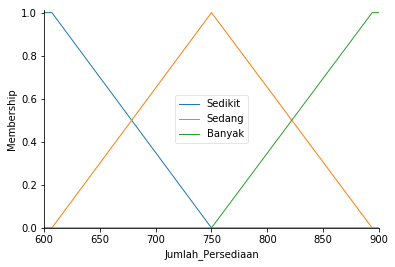

In [5]:
persediaan.view() #aturan untuk memunculkan variabel persediaan

### 3.membuat fungsi keangggotaan untuk variabel produksi       (Output)

In [6]:
produksi = ctrl.Consequent(np.arange(1950, 2601, 1),'Jumlah_Produksi') #variabel permintaan untuk nilai 1950 sampai 2610 dengan range 1

produksi['Sedikit'] = fuzz.trapmf(produksi.universe,[1950, 1950, 1996, 2275]) #fungsi keanggotaan untuk trapesium dengan nilai 1950 sampai 2275
produksi['Sedang'] = fuzz.trimf(produksi.universe,[1996, 2275, 2579]) #fungsi keanggotaan untuk segitiga dengan nilai 1996 sampai 2579
produksi['Banyak'] = fuzz.trapmf(produksi.universe,[2275, 2579, 2600, 2600]) #fungsi keanggotaan untuk trapesium dengan nilai 2275 sampai 2579

$Produksi[Sedikit] =
\left\{
    \begin {array}{ll}
        1 & \mbox{; } y\leq 1996\\
        {2275-x \over 2275-1996} & \mbox{; } 1996 < x < 2275 \\
        0 & \mbox{; } x \geq 2275
     \end {array}
\right.$

$Produksi[Sedang] =
\left\{
    \begin {array}{ll}
        0 & \mbox{; } y\leq 1996 & atau &x \geq 2579\\
        {x-2275 \over 2275-1996} & \mbox{; } 1996 < x < 2275 \\
         {2579-x \over 2579-2275} & \mbox{; } 2275 \leq  x \leq 2579
     \end {array}
\right.$

$Produksi[Banyak] =
\left\{
    \begin {array}{ll}
        0 & \mbox{; } y\leq 2257\\
        {x-2257 \over 2579-2257} & \mbox{; } 2257 < x < 2579 \\
        1 & \mbox{; } x \geq 2579
     \end {array}
\right.$


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


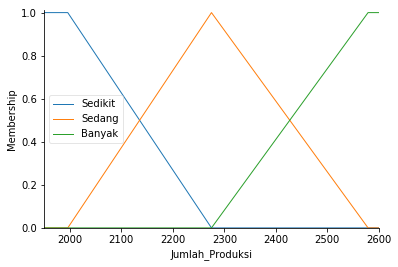

In [7]:
produksi.view() #aturan untuk memunculkan variabel produksi

## RULE BASE

Pada tahap ini, nilai keanggotaan himpunan permintaan dan persediaan saat ini dicari menggunakan fungsi keanggotaan himpunan Fuzzy berdasarkan data. Pembentukan Aturan Fuzzy, Dari dua variabel input dan sebuah variabel output yang telah didefinisikan, dengan melakukan analisa data terhadap batas tiap-tiap himpunan Fuzzy pada tiap-tiap variabelnya maka terdapat 9 aturan Fuzzy yang akan dipakai dalam sistem ini, dengan susunan aturan IF permintaan IS … AND persediaan IS … THEN produksi IS  …, hasilnya dapat dilihat pada Tabel 4, yaitu: 

| No | Permintaan | Persediaan  | Produksi    | 
|----|------------|-------------|-------------|
| 1  |    Kecil   |   Sedikit   |   Sedikit   |
| 2  |    Kecil   |   Sedang    |   Sedikit   |
| 3  |    Kecil   |   Banyak    |   Sedikit   | 
| 4  |   Sedang   |   Sedikit   |   Sedikit   |
| 5  |   Sedang   |   Sedang    |   Sedang    | 
| 6  |   Sedang   |   Banyak    |   Sedang    | 
| 7  |    Besar   |   Sedikit   |   Sedikit   | 
| 8  |    Besar   |   Sedang    |   Sedang    | 
| 9  |    Besar   |   Banyak    |   Banyak    | 

<center>__Aturan Fuzzy__

In [8]:
rule1 = ctrl.Rule(permintaan['Kecil'] & persediaan['Sedikit'] , produksi['Sedikit'])
rule2 = ctrl.Rule(permintaan['Kecil'] & persediaan['Sedang'] , produksi['Sedikit'])
rule3 = ctrl.Rule(permintaan['Kecil'] & persediaan['Banyak'] , produksi['Sedikit'])
rule4 = ctrl.Rule(permintaan['Sedang'] & persediaan['Sedikit'] , produksi['Sedikit'])
rule5 = ctrl.Rule(permintaan['Sedang'] & persediaan['Sedang'] , produksi['Sedang'])
rule6 = ctrl.Rule(permintaan['Sedang'] & persediaan['Banyak'] , produksi['Sedang'])
rule7 = ctrl.Rule(permintaan['Besar'] & persediaan['Sedikit'] , produksi['Sedikit'])
rule8 = ctrl.Rule(permintaan['Besar'] & persediaan['Sedang'] , produksi['Sedang'])
rule9 = ctrl.Rule(permintaan['Besar'] & persediaan['Banyak'] , produksi['Banyak'])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x17bdacda4a8>)

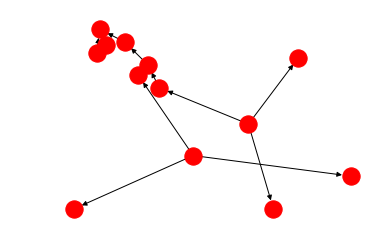

In [9]:
rule1.view() #mencetak gambar aturan rule 1

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x17bdad46400>)

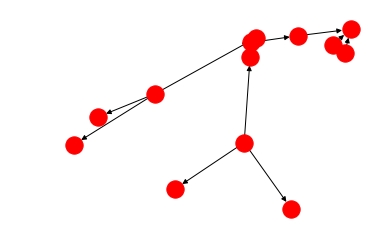

In [10]:
rule2.view() #mencetak gambar aturan rule 2

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x17bdadd3320>)

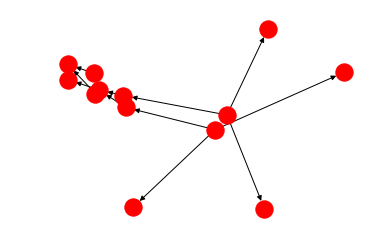

In [11]:
rule3.view() #mencetak gambar aturan rule 3

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x17bdac906a0>)

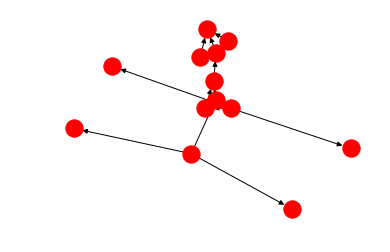

In [12]:
rule4.view() #mencetak gambar aturan rule 4

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x17bdad82da0>)

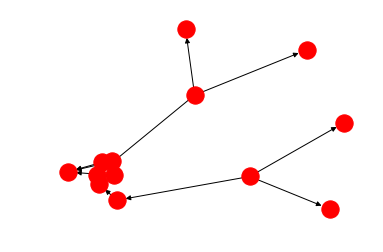

In [13]:
rule5.view() #mencetak gambar aturan rule 5

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x17bdab0d668>)

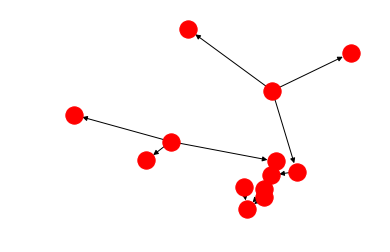

In [14]:
rule6.view() #mencetak gambar aturan rule 6

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x17bdae23be0>)

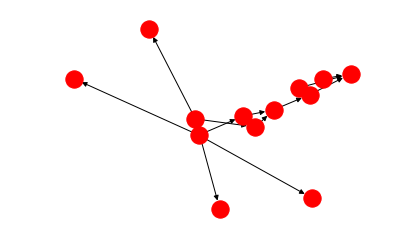

In [15]:
rule7.view() #mencetak gambar aturan rule 7

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x17bdae79518>)

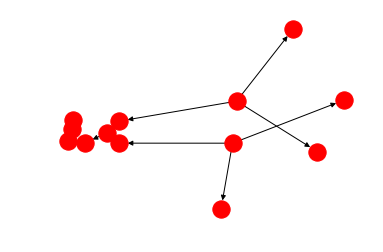

In [16]:
rule8.view() #mencetak gambar aturan rule 8

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x17bdab24198>)

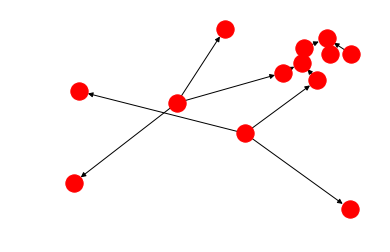

In [17]:
rule9.view() #mencetak gambar aturan rule 9

## FUZZY INFERENCE

Dari beberapa metode dalam fuzzy inference system,untuk menghitung jumlah produksi roti berdasarkan data persediaan dan jumlah permintaan disini saya akan menggunakan metode mamdani untuk pengganti perhitungan metode sugeno.

In [18]:
tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])

Untuk menstimulasikan sistem kontrol ini, dibuatlah ControlSystemSimulation. Hal ini akan mewakili pengontrol yang diterapkan pada serangkaian situasi tertentu.

In [19]:
tipping  = ctrl.ControlSystemSimulation(tipping_ctrl)

## DEFUZZYFIKASI
Defuzzifikasi merupakan tahapan akhir dari suati sistem logika dan pengubahan output fuzzy yang diperoleh dari mesin inferensi menjadi nilai tegas menggunakan fungsi keanggotaan yang sesuai dengan saat dilakukan fuzzyfikasi. 

## Contoh Kasus
Misalkan didalam data dimasukkan nilai 1200 untuk permintaan, nilai 500 untuk persediaan, maka jumlah produksi termasuk kedalam golongan ?

In [20]:
tipping.input['Jumlah_Permintaan'] = 1145
tipping.input['Jumlah_Persediaan'] = 865
tipping.compute()

setelah penginputan nilai berikut tampilan dari output variabel Jumlah_produksi yang terbagi atas 3 himpunan yaitu Sedikit, Sedang, Banyak. dalam hal ini dengan inputan yang telah ditentukan.

2210.6155719883895


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


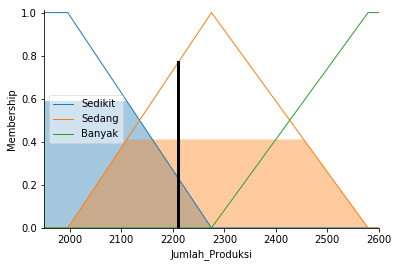

In [21]:
print(tipping.output['Jumlah_Produksi'])
produksi.view(sim=tipping)

maka outputnya adalah 2210.6 

$1.input.Jumlah Permintaan[1145] =
\left\{
    \begin {array}{ll}
         {1310-1145 \over 1310-1030} & \mbox{= } 0,59\\
         {1145-1030 \over 1310-1030} & \mbox{= } 0,41
     \end {array}
\right.$

$2.input.Jumlah Persediaan[865] =
\left\{
    \begin {array}{ll}
         {894-865 \over 894-750} & \mbox{= } 0,2\\
         {865-750 \over 894-750} & \mbox{= } 0,8
     \end {array}
\right.$

#### nilai Minimal pada input 
<center>=min(0.59,0.2), min(0.59,0.8),min(0.41,0.2),min(0.41,0.8) = (0.2,0.59,0.2,0.41)

### Menentukan nilai akhir dengan metode COG (Centre Of Gravity)
<center>$COG =
\left\{
    \begin {array}{ll}
         {(2000+2100)0.59 + (2200+2300+2400+2500)0.41 \over 0.59+0.59+0.41+0.41+0.41+0.41} & \mbox{= } 2224.46809
     \end {array}
\right.$

#### Hasil dari percobaan dengan fuzzy ini yaitu 2224.46809 . . menyatakan bahwa tingkat produksi sebuah roti termasuk dalam range sedang dan selisih perhitungan secara manual dan fuzzy adalah sebesar 24,2......